### Basic EDA - Knowing your Data

Before we analyze the data using machine learning techniques, we must understand the dataset we are dealing with. <br> We may or may not have the domain knowledge for every dataset, however, <b> Exploratory Data Analysis</b> techniques can be used to uncover important charecteristics of the data, including but not limited to<br>
1) Characteristics of individual attributes<br> 
2) Correlations between multiple attributes<br>
3) Viewing target values again reduced dimensions / against specific dimensions, etc.<br> 
4) Extract important attributes<br>
5) Find anamolies / outliers, if any <br>

<b> EDA </b> helps us maximize our insight into the data we are analyzing.
<br>
As a part of graphical EDA, we plot raw data as well as derived statistical metrics.<br> With experience, one can derive deeper insights from the data<br>

We can say that by performing EDA, we postpone the algorithm selection and model fitting, till the point we get a better understanding of the data itself to make a choice of the same. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries

#NUmber crunching
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 

%matplotlib inline

Load the Data

In [3]:
%pwd

'C:\\Users\\Shraddha'

In [4]:
dataset = pd.read_csv(r'C:\Users\Shraddha\srk_datasets\housing.csv')

We will use various means to understand what our data looks like

Know the dimensions of the data using dataset.shape

In [5]:
dataset.shape

(20640, 10)

A simple listing of columns can be obtained using the .columns attribute

In [6]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Let us view top 5 rows of our dataset

In [7]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As seen above, we get 0-indexed top 5 rows of the dataset along with column headers <br> 
Now, we use the .info() function to view a brief description of the data<br>
The information displayed includes <br>
1) Number of rows<br> 
2) Number of columns <br>
3) Column Name - Non-null Count - Dtype of the column<br>
4) Memory usage by the dataset object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<b> Null Values </b> Whenever the non-null count is less than the total number or entries / rows, it implies that there are null or missing values in the dataset and those need to be handled before analysis. <br> 
Columns with very large number of missing values can be dropped, unless they can be filled by using domain knowledge<br>
<b> Non-Numeric Columns</b> We also come to know if there are any non-numeric data columns in the dataset. We may want to convert them into numeric types using one of the many available ways to do so. <br> 

We can obtain the different values present in the non-numeric columns by using the valuecounts() function as below:

In [9]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can explore the <b>numeric attributes</b> by using the .describe() method on the dataset as below:<br> This method displays the statistical measures associated with the dataset columns such as mean, std_dev, minimum, maximum, 25%, 50% and 75% percentiles (or 1st, 2nd and 3rd quantile ranges) <br>
From this display, you can also understand the ranges of different features. If multiple features have largely different order of magnitude of data, we usually go for what is called <b> feature scaling</b>

In [10]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualizing data is a very easy and quick way to understand data. We will see a few plots which will help us understand data characteristics.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

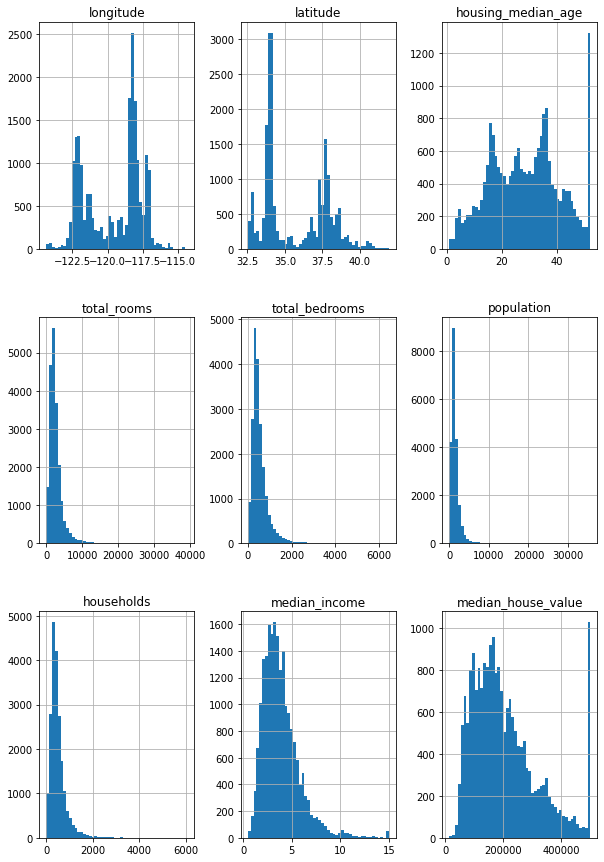

In [11]:
dataset.hist(bins=50,figsize=(10,15))

In [12]:
plt.show() #Optional in JUpiter notebook

Some behaviour patterns you may note above is <br>
1) Capped data - data may be capped at one or both ends. It may be better to remove such rows, as it will limit the ability to correctly learn rules which predict beyond the given range<br>
2) Tail heavy graphs, with trailing tails, need further transformation to convert them into near bell-shaped patterns<br>

### Creating a Test Set

The purpose of creating a test set typically before analysis, is to avoid data snooping bias <br> We must maintain a strict separation of data used to develop hypotheses and train models from the data used to test them.

In [13]:
ds_train, ds_test = train_test_split(dataset, test_size=0.2, random_state=0)

In [14]:
ds_train.shape, ds_test.shape

((16512, 10), (4128, 10))

### Finding Correlations in dataset attributes

The corr() method on the dataset can be used to find correlations between every pair of attributes

In [15]:
ds_corr_matrix = ds_train.corr()

In [16]:
ds_corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924889,-0.113274,0.054460,0.079027,0.105128,0.062973,-0.015081,-0.047277
latitude,-0.924889,1.000000,0.016348,-0.046149,-0.075894,-0.114819,-0.078693,-0.081245,-0.142702
housing_median_age,-0.113274,0.016348,1.000000,-0.365816,-0.326871,-0.298908,-0.309804,-0.115757,0.106470
total_rooms,0.054460,-0.046149,-0.365816,1.000000,0.931974,0.855653,0.919641,0.197831,0.133016
total_bedrooms,0.079027,-0.075894,-0.326871,0.931974,1.000000,0.876545,0.978849,-0.006074,0.045394
population,0.105128,-0.114819,-0.298908,0.855653,0.876545,1.000000,0.907018,0.004533,-0.027053
households,0.062973,-0.078693,-0.309804,0.919641,0.978849,0.907018,1.000000,0.014567,0.062294
median_income,-0.015081,-0.081245,-0.115757,0.197831,-0.006074,0.004533,0.014567,1.000000,0.692758
median_house_value,-0.047277,-0.142702,0.106470,0.133016,0.045394,-0.027053,0.062294,0.692758,1.000000


We can see correlations <br>
1) Between attributes - to avoid multi-correlation <br>
2) Between attributes and target  - to select features<br>

Let us specifically see which attributes have the highest correlation with target variable

In [17]:
ds_corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.692758
total_rooms           0.133016
housing_median_age    0.106470
households            0.062294
total_bedrooms        0.045394
population           -0.027053
longitude            -0.047277
latitude             -0.142702
Name: median_house_value, dtype: float64

We see that of the various attributes, median_income shows the highest correlation with the median_house_value<br>
Let us now look at some graphs which show varying correlations<br> This will help us gauge the correlations between attributes when we plot them graphically.<br>

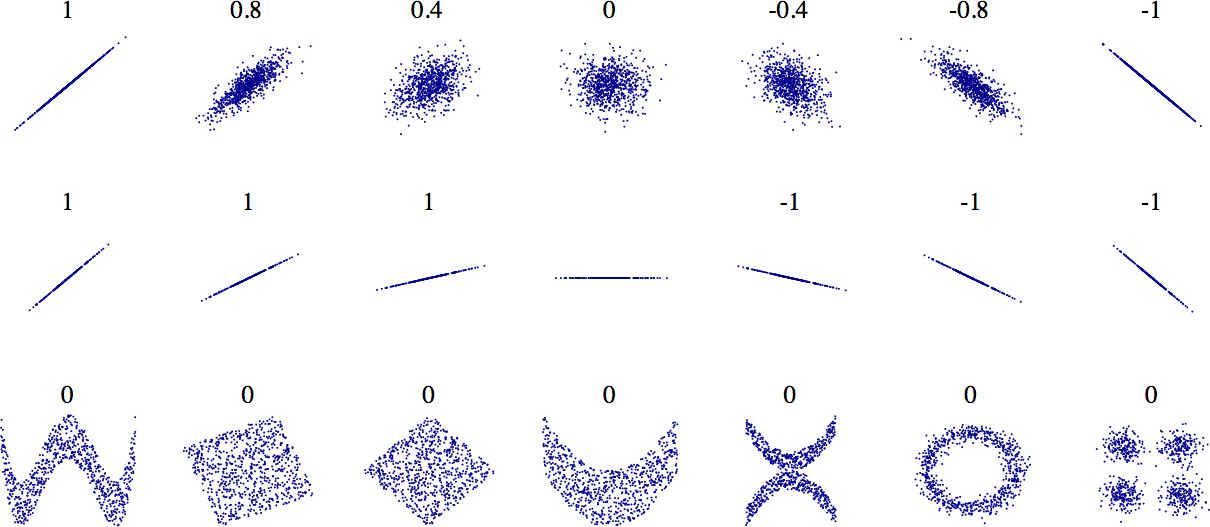

Now we will check out the scatter plots of the variables of our dataset

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='population', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='households', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='population', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='households', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_r

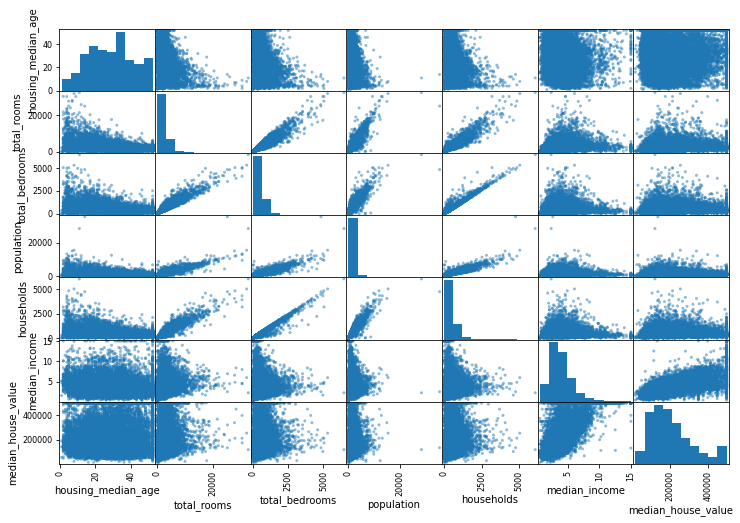

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["housing_median_age","total_rooms","total_bedrooms","population","households", "median_income","median_house_value"]
scatter_matrix(ds_train[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

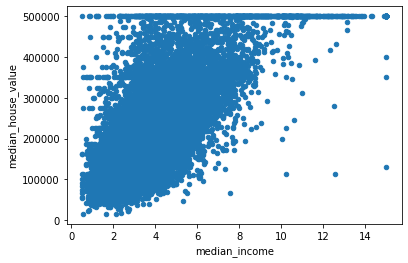

In [19]:
ds_train.plot(kind="scatter", x="median_income", y="median_house_value")#,alpha=0.1)

### Geographical Insights
Let us try to obtain some geographical insights

Let us perform the lat-long analysis for the California housing dataset

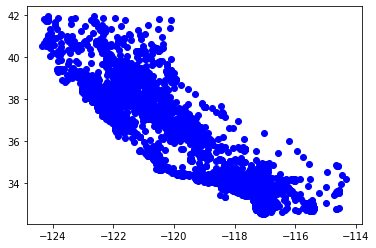

In [20]:
#We now analyze the variour individual features of the dataset
plt.scatter(x=ds_train["longitude"], y=ds_train["latitude"],color="blue")


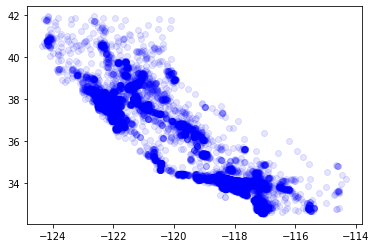

In [21]:
plt.scatter(x=ds_train["longitude"], y=ds_train["latitude"],color="blue", alpha=0.1)


Next, we plot the scatter plot with latitude, longitude and the color of points depicted by the population scale. 

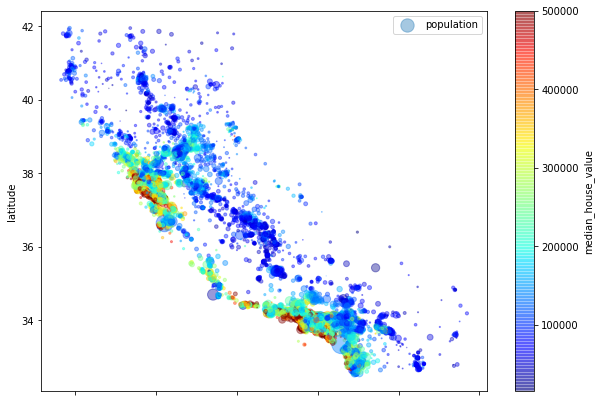

In [22]:
ds_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=ds_train["population"]/100, 
              label="population", figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

Now, let us try to load another dataset - the forest fires dataset from UCI https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [23]:
fires_ds = pd.read_csv(r'C:\Users\Shraddha\srk_datasets\forestfires.csv')

In [24]:
fires_ds.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Now, we add depth to this graph. This will help us identify the real density of points. <br> For this we use the alpha parameter

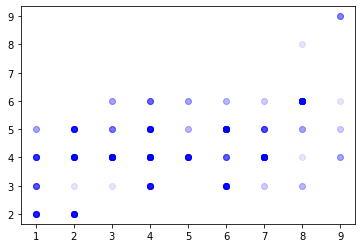

In [25]:
#We now analyze the spread of the dataset
plt.scatter(x=fires_ds["X"], y=fires_ds["Y"],color="blue",alpha=0.1)


### Distribution plot with seaborn

<AxesSubplot:xlabel='housing_median_age'>

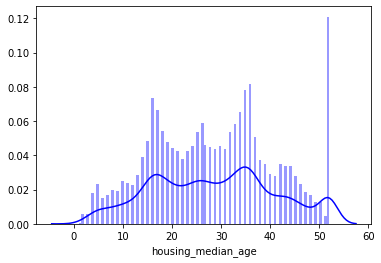

In [27]:
 sns.distplot(dataset['housing_median_age'], color ='b', bins = 100)

Looking at the high frequency in the last bin, we come to know that there has been a capping of the larger values at 50. <br> So, the model we build cannot be used to predict the values of the houses which are more than 50 years old, correctly.

### Dealing with Missing Values

We can deal with missing data using one of the following ways:  <br>
Get rid of the corresponding tuples.<br>
Get rid of the whole attribute. <br>
Set the values to some value (zero, the mean, the median, etc.).<br>

Let us try it out.<br>

In [28]:
#ds_train.dropna(subset=["total_bedrooms"]) # option 1
#ds_train.drop("total_bedrooms", axis=1) # option 2
#median = ds_train["total_bedrooms"].median() # option 3
#ds_train["total_bedrooms"].fillna(median, inplace=True)

### Outlier Detection

Using Box plots : A box and whisker plot – also called a box plot – displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

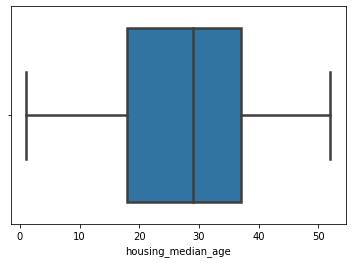

In [29]:
ax = sns.boxplot(x=dataset["housing_median_age"],linewidth=2.5)

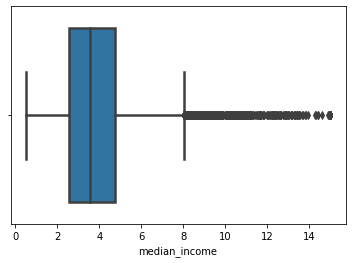

In [30]:
ax = sns.boxplot(x=dataset["median_income"],linewidth=2.5)